# **Differentiation Infrastructure in Deepchem**

Author : Rakshit Kr. Singh : [Website](https://greatrsingh.in/) : [LinkedIn](https://www.linkedin.com/in/rakshit-singh-ai/) : [GitHub](https://github.com/GreatRSingh)

Differentiation Methods like Broyden's Methods is capable of allowing solutions in non-archimedean settings that's why it is widely used in the field of Quantum Chemistry. Additionally, Broyden's method has been successfully applied to accelerate the convergence of nonlinear equations systems in semiconductor device simulations, outperforming other methods in terms of accuracy and iteration steps. **Deepchem** is moving towards leveraging these capabilities to solve complex problems in the field of Quantum Chemistry and Drug Discovery.

## What are Non Linear Equations? and Why do they matter?

Nonlinear equations are mathematical expressions where the relationship between the variables is not linear. Unlike linear equations, which have a constant rate of change, nonlinear equations involve terms with higher powers or functions like exponentials, logarithms, trigonometric functions, etc.

Non-linear equations are essential across various disciplines, including physics, engineering, economics, biology, and finance. They describe complex relationships and phenomena that cannot be adequately modeled with linear equations. From gravitational interactions in celestial bodies to biochemical reactions in living organisms, non-linear equations play a vital role in understanding and predicting real-world systems. Whether it's optimizing structures, analyzing market dynamics, or designing machine learning algorithms, solving non-linear equations is fundamental for advancing scientific knowledge and technological innovation.

### Some Simple Non Linear Equations:

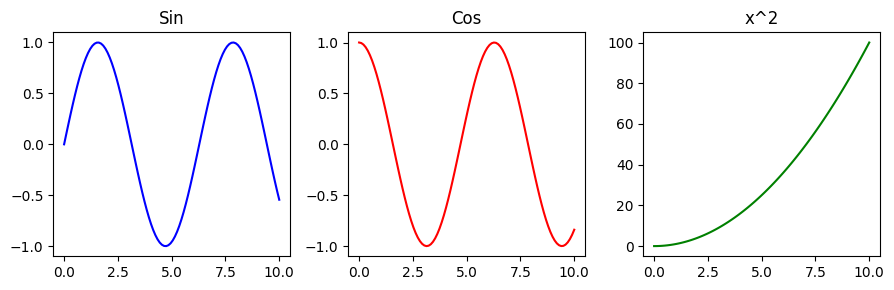

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = x**2

fig, axs = plt.subplots(1, 3, figsize=(9, 3))  

axs[0].plot(x, y1, color='blue')
axs[0].set_title('Sin')

axs[1].plot(x, y2, color='red')
axs[1].set_title('Cos')

axs[2].plot(x, y3, color='green')
axs[2].set_title('x^2')

plt.tight_layout()

plt.show()

## Root Finding Methods

Broyden's First Method, is an iterative numerical method used for solving systems of nonlinear equations. It's particularly useful when the Jacobian matrix (the matrix of partial derivatives of the equations) is difficult or expensive to compute. 

Broyden's Method is an extension of the Secant Method for systems of nonlinear equations. It iteratively updates an approximation to the Jacobian matrix using the information from previous iterations. The algorithm converges to the solution by updating the variables in the direction that minimizes the norm of the system of equations.

### Steps of Broyden's Method:

1. Initialize the approximation to the Jacobian matrix.
$$J$$
2. Initialize the variables.
$$X_{k} = f(X_{k})$$
3. Compute the function values.
$$f_{k} = f(X_{k})$$
4. Update the variables.
$$X_{k+1} = X_{k+1} - J_{k}^{-1}f_k$$
5. Compute the change in variables.
$$b = X_{k+1} - X_{k}$$
6. Compute the function values.
$$f_{k+1} = f(X_{k+1})$$
7. Update the approximation to the Jacobian matrix.
$$J_{k+1} = J_{k} + \frac{f_{k+1}b^{T}}{b^{T}b}$$
8. Update the inverse of the Jacobian matrix.
$$J_{k+1}^{-1} = inv(J_{k+1})$$
9. Repeat steps 4-8 until convergence criteria are met.

### References:

[1].. "A class of methods for solving nonlinear simultaneous equations" by Charles G. Broyden

In [2]:
import torch
from deepchem.utils.differentiation_utils import rootfinder
def func1(y, A):
    return torch.tanh(A @ y + 0.1) + y / 2.0
A = torch.tensor([[1.1, 0.4], [0.3, 0.8]]).requires_grad_()
y0 = torch.zeros((2,1))

# Broyden's First Method
yroot = rootfinder(func1, y0, params=(A,), method='broyden1')
print("Root By Broyden's First Method:")
print(yroot)
print(func1(yroot, A))

# Broyden's Second Method
yroot = rootfinder(func1, y0, params=(A,), method='broyden2')
print("\nRoot by Broyden's Second Method:")
print(yroot)
print(func1(yroot, A))

Root By Broyden's First Method:
tensor([[-0.0459],
        [-0.0663]], grad_fn=<_RootFinderBackward>)
tensor([[1.1735e-07],
        [1.7881e-07]], grad_fn=<AddBackward0>)

Root by Broyden's Second Method:
tensor([[-0.0459],
        [-0.0663]], grad_fn=<_RootFinderBackward>)
tensor([[ 1.0300e-06],
        [-3.2783e-07]], grad_fn=<AddBackward0>)


# Minimizer

Minimization algorithms, including variants of gradient descent like ADAM, are fundamental tools in various fields of science, engineering, and optimization. Here are some common usage scenarios and applications of minimization algorithms:

- Function Optimization: Minimization algorithms are used to find the minimum (or maximum) of a function. This is applicable in various contexts such as mathematical optimization, engineering design, finance (e.g., portfolio optimization), and physics (e.g., minimizing energy functions).

- Global Optimization: Minimization algorithms are employed in global optimization problems where the goal is to find the global minimum of a function within a given domain. Evolutionary algorithms, simulated annealing, and particle swarm optimization are examples of algorithms used for global optimization.

- Nonlinear Optimization: Minimization algorithms are crucial for solving nonlinear optimization problems, where the objective function or constraints are nonlinear. These problems arise in engineering design, process optimization, and operations research.

- Quantum Computing: Minimization algorithms play a role in quantum computing, particularly in quantum optimization and quantum machine learning. Quantum annealing and variational quantum algorithms are examples of techniques used for optimization tasks.

- Control Systems: Minimization algorithms are used in control systems engineering to optimize control strategies and parameters for achieving desired system behavior and performance.

These are just a few examples of the wide-ranging applications of minimization algorithms. They are essential tools for solving optimization problems in diverse fields, ranging from scientific research and engineering to finance and machine learning.

## Gradient Descent (GD)

<h5>
Gradient descent is a method for unconstrained mathematical optimization. It is a first-order iterative algorithm for finding a local minimum of a differentiable multivariate function.
<br>
<br>
Gradient Descent is a fundamental optimization algorithm used to minimize the cost function in various machine learning and optimization problems. It iteratively updates the parameters in the direction of the negative gradient of the cost function.
</h5>

In [5]:
import torch
from deepchem.utils.differentiation_utils.optimize.minimizer import gd
def fcn(x):
    return 2 * x + (x - 2) ** 2, 2 * (x - 2) + 2
x0 = torch.tensor(0.0, requires_grad=True)
x = gd(fcn, x0, [])
x, fcn(x)

(tensor(0.9973), (tensor(3.0000), tensor(-0.0053)))

In [14]:
import torch
from deepchem.utils.differentiation_utils.optimize.minimizer import adam
def fcn(x):
    return 2 * x + (x - 2) ** 3, 2 * (x - 2)**2 + 2
x0 = torch.tensor(0.0, requires_grad=True)
x = adam(fcn, x0, [])
x, fcn(x)

(tensor(-1.1687), (tensor(-34.1530), tensor(22.0812)))

## Citing This Tutorial

If you found this tutorial useful please consider citing it using the provided BibTeX.

```bibtex
@manual{Quantum Chemistry, 
 title={Differentiation Infrastructure in Deepchem}, 
 organization={DeepChem},
 author={Singh, Rakshit kr.},
 howpublished = {\url{https://github.com/deepchem/deepchem/blob/master/examples/tutorials/Differentiation_Infrastructure_in_Deepchem.ipynb}}, 
 year={2024}, 
} 
```

# Congratulations! Time to join the Community!

Congratulations on completing this tutorial notebook! If you enjoyed working through the tutorial, and want to continue working with DeepChem, we encourage you to finish the rest of the tutorials in this series. You can also help the DeepChem community in the following ways:

## Star DeepChem on [GitHub](https://github.com/deepchem/deepchem)
This helps build awareness of the DeepChem project and the tools for open source drug discovery that we're trying to build.


## Join the DeepChem Discord
The DeepChem [Discord](https://discord.gg/SxSzjRRDMA) hosts a number of scientists, developers, and enthusiasts interested in deep learning for the life sciences. Join the conversation!